# Example notebook

Companion to [“A numerical transcendental method in algebraic geometry”](http://arxiv.org/abs/1811.10634).

## Introduction

In [33]:
sys.path.insert(0, '..')
import numperiods

In [2]:
R.<w,x,y,z> = PolynomialRing(QQ)

With `numperiods`, we can only compute the periods of a given surface by deformation of the periods of another surface. Fortunately, for one special family of hypersurfaces, we have explicit formulas in terms of the Γ functions which makes it possible to bootstrap.

Just for a moment, we lower the defaut precision to 100 bits (for more readable display).

In [3]:
numperiods.config.precision = 100

`fermat` is mostly a wrapper around a polynomial.

In [4]:
fermat = numperiods.FermatHypersurface(R, 5)
fermat.pol

w^5 + x^5 + y^5 + z^5

Below is the matrix of periods of the Fermat surface of degree 5, denoted $X$.

It the matrix of the bilinear map $\Omega^2(X) \times H_2(X, \mathbb{Z}) \to \mathbb{C}$
which maps a holomorphic 2-form $\alpha$ on $X$ and a 2-cycle $\gamma$ to $\int_\gamma \alpha$.

In [5]:
fermat.simple_periods().augmented_matrix()

4 x 53 dense matrix over Complex ball field with 100 bits of precision (use the '.str()' method to see the entries)

In [6]:
_.parent()

Full MatrixSpace of 4 by 53 dense matrices over Complex ball field with 100 bits of precision

The basis for the space $\Omega^2(X)$ of holomorphic 2-forms is displayed below, with the convention that a monomial $m$ represents the Poincaré residue of $\frac{m}{f} ( w dx dy dz - x dwdydz + ydwdxdz - zdwdxdy )$. For a quartic surface, there is a single holomorphic form.

In [7]:
fermat.cohomology().holomorphic_forms()

[z, y, x, w]

The basis of the homology $H_2(X,\mathbb{Z})$ is displayed below, with the isomorphism described by Looijenga [https://arxiv.org/abs/1005.1733], following Pham.  Actually, this is only a basis of the *primitive* homology. The full homology has one extra generator but it does not add new periods.

In [8]:
fermat.homology().prim_basis()

[1,
 z,
 y,
 x,
 w,
 z^2,
 y*z,
 x*z,
 w*z,
 y^2,
 x*y,
 w*y,
 x^2,
 w*x,
 w^2,
 z^3,
 y*z^2,
 x*z^2,
 w*z^2,
 y^2*z,
 x*y*z,
 w*y*z,
 x^2*z,
 w*x*z,
 w^2*z,
 x*y^2,
 w*y^2,
 x^2*y,
 w^2*y,
 w*x^2,
 w^2*x,
 y*z^3,
 x*z^3,
 w*z^3,
 y^2*z^2,
 x*y*z^2,
 w*y*z^2,
 x^2*z^2,
 w*x*z^2,
 w^2*z^2,
 x*y^2*z,
 w*y^2*z,
 x^2*y*z,
 w^2*y*z,
 w*x^2*z,
 w^2*x*z,
 x^2*y^2,
 w^2*y^2,
 y^2*z^3,
 x*y*z^3,
 x*y^2*z^2,
 x*y^2*z^3]

For computing the periods of another surface of degree 5, starting from `fermat`, we need all the matrix of the full pairing $H^2_{\text{dR}}(X) \times H_2(X, \mathbb{Z}) \to \mathbb{C}$. Actually, it is only a 52×52 matrix because it is enough to consider primitive homology and cohomology. The holomorphic periods are the first two rows of this matrix.

In [9]:
fermat.primitive_periods().matrix

52 x 52 dense matrix over Complex ball field with 100 bits of precision (use the '.str()' method to see the entries)

We can now compute by deformation the periods of any surface. Well... in principle only. In practice, the computation is too long if the coefficients of the target are too generic.
So let us focus on degree 4 surfaces.

The computation time behaves very well with respect to the precision.

In [10]:
numperiods.config.precision = 10000
fermat = numperiods.FermatHypersurface(R, 4)
%time fermat.primitive_periods().deformation(w^4+x^4+y^4+z^4+w*x*y*z, only_simple_periods=True).matrix

CPU times: user 875 ms, sys: 9.62 ms, total: 884 ms
Wall time: 886 ms


[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## A worked example

This is the example in §2.2 of the paper.

We use 2000 bits of precision (about 600 decimal digits). It is what we used to construct the proof-of-concept database [quarticdb](https://pierre.lairez.fr/quarticdb).

In [9]:
numperiods.config.precision = 1000

In [10]:
pol = 3*x^3*z - 2*x^2*y^2 + x*z^3 - 8*y^4 - 8*w^4 +5*x^2*w^2

We compute the periods by deformation. The option `only_simple_periods=True` is used to compute only the periods of holomorphic forms. Computing all the periods is useful to make `pol` a new possible starting point for the deformation method. The option `keep_family=True` is just here for showcasing.

The computation takes about a minute.

In [12]:
import logging
logging.basicConfig()
logging.getLogger('numperiods').setLevel(logging.INFO)
logging.getLogger('ore_algebra.analytic').setLevel(logging.INFO)
%time per = numperiods.FermatHypersurface(R, 4).primitive_periods().deformation(pol, only_simple_periods=True, keep_family=True)

INFO:numperiods.periods:Computing Fermat primitive periods.
INFO:numperiods.family:Computing a nice path for integration.
INFO:numperiods.family:Computing generators of a cyclic decomposition (only_holomorphic_forms=True).
INFO:numperiods.family:Computing generators of a cyclic decomposition modulo a random prime.
INFO:numperiods.family:Computing generators of a cyclic decomposition (only_holomorphic_forms=True).
INFO:numperiods.family:Computing Gauss-Manin connection
INFO:numperiods.interpolation.FunctionReconstruction:Evaluating at 101
INFO:numperiods.interpolation.FunctionReconstruction:Trying rational reconstruction...
INFO:numperiods.interpolation.FunctionReconstruction:Reconstruction failed.
INFO:numperiods.interpolation.FunctionReconstruction:Evaluating at 102
INFO:numperiods.interpolation.FunctionReconstruction:Evaluating at 103
INFO:numperiods.interpolation.FunctionReconstruction:Evaluating at 104
INFO:numperiods.interpolation.FunctionReconstruction:Evaluating at 105
INFO:nump

KeyboardInterrupt: 

Exception ignored in: 'sage.graphs.base.c_graph._reorganize_edge'
Traceback (most recent call last):
  File "sage/symbolic/expression.pyx", line 3493, in sage.symbolic.expression.Expression.__nonzero__ (build/cythonized/sage/symbolic/expression.cpp:48633)
  File "sage/symbolic/expression.pyx", line 10676, in sage.symbolic.expression.Expression.simplify_full (build/cythonized/sage/symbolic/expression.cpp:81839)
  File "sage/symbolic/expression.pyx", line 11258, in sage.symbolic.expression.Expression.expand_sum (build/cythonized/sage/symbolic/expression.cpp:85288)
  File "sage/structure/parent.pyx", line 898, in sage.structure.parent.Parent.__call__ (build/cythonized/sage/structure/parent.c:9458)
  File "sage/structure/coerce_maps.pyx", line 156, in sage.structure.coerce_maps.DefaultConvertMap_unique._call_ (build/cythonized/sage/structure/coerce_maps.c:4626)
  File "sage/symbolic/ring.pyx", line 386, in sage.symbolic.ring.SymbolicRing._element_constructor_ (build/cythonized/sage/symboli

CPU times: user 58min 29s, sys: 1.77 s, total: 58min 31s
Wall time: 1h 48min 27s


### Details about the computation of periods

For the deformation method, we consider the periods of a 1-dimensional family of surfaces, defined by the polynomial below.
At $t=0$, this is the Fermat surface, and at $t=1$, this is the target surface.

In [14]:
per.family.pol

(-9*w^4 + 5*w^2*x^2 - x^4 - 2*x^2*y^2 - 9*y^4 + 3*x^3*z + x*z^3 - z^4)*t + w^4 + x^4 + y^4 + z^4

The 22 periods of this surface (as functions of the parameter $t$) are solutions of a Picard-Fuchs differential equation. It is a linear differential equation with polynomial coefficients. In this case, the differential equation has order 5 and the coefficients have degree 59. It is already big, but generically (for quartic surfaces), it is even worse: order 21 and degree about 300. Computing the equation gets harder and computing numerically the solution is even harder.

In [20]:
dop = per.family.picard_fuchs_equation(form=R(1))

In [27]:
p1 = dop.coefficients()[-2]
p0 = dop.coefficients()[-1]

In [35]:
PR = CC['t']
(PR(p0)/PR(p1)).partial_fraction_decomposition()

/tmp/ipykernel_285923/1293568015.py:2: RuntimeWarning: cypari2 leaked 1678432 bytes on the PARI stack
  (PR(p0)/PR(p1)).partial_fraction_decomposition()


KeyboardInterrupt: 

In [39]:
dop.indicial_polynomial(p0.factor()[-1])

AttributeError: 'tuple' object has no attribute 'parent'

In [58]:
PR = QQbar['t']


In [53]:
mat, den = per.family.gaussmanin()

In [55]:
den.factor()

(t - 1/9)^2 * t^4 * (t^6 - 663/337*t^5 + 471/674*t^4 + 352/337*t^3 - 408/337*t^2 + 192/337*t - 32/337) * (t^9 - 65794779/27532819*t^8 + 57543600/27532819*t^7 - 18521232/27532819*t^6 - 11084352/27532819*t^5 + 18487104/27532819*t^4 - 8646656/27532819*t^3 + 1634304/27532819*t^2 - 135168/27532819*t + 4096/27532819) * (t^9 - 63925347/27135323*t^8 + 56519280/27135323*t^7 - 21920464/27135323*t^6 - 6316608/27135323*t^5 + 16447296/27135323*t^4 - 8364032/27135323*t^3 + 1622016/27135323*t^2 - 135168/27135323*t + 4096/27135323) * (t^9 - 4518567/1924303*t^8 + 3044280/1924303*t^7 + 875496/1924303*t^6 - 2584788/1924303*t^5 + 1849956/1924303*t^4 - 633152/1924303*t^3 + 106176/1924303*t^2 - 8448/1924303*t + 256/1924303) * (t^25 - 285485072063432576069/35509726564429319863*t^24 + 1105144306571256457217/35509726564429319863*t^23 - 2752448432325786243555/35509726564429319863*t^22 + 4929361488516982219724/35509726564429319863*t^21 - 6643757570901406391372/35509726564429319863*t^20 + 6770361539636863144472/3

In [63]:
(mat.trace()/den).partial_fraction_decomposition()

(0,
 [-10/(t - 1/9),
  15/t,
  (-9*t^5 + 9945/674*t^4 - 1413/337*t^3 - 1584/337*t^2 + 1224/337*t - 288/337)/(t^6 - 663/337*t^5 + 471/674*t^4 + 352/337*t^3 - 408/337*t^2 + 192/337*t - 32/337),
  (-18*t^8 + 1052716464/27532819*t^7 - 805610400/27532819*t^6 + 222254784/27532819*t^5 + 110843520/27532819*t^4 - 147896832/27532819*t^3 + 51879936/27532819*t^2 - 6537216/27532819*t + 270336/27532819)/(t^9 - 65794779/27532819*t^8 + 57543600/27532819*t^7 - 18521232/27532819*t^6 - 11084352/27532819*t^5 + 18487104/27532819*t^4 - 8646656/27532819*t^3 + 1634304/27532819*t^2 - 135168/27532819*t + 4096/27532819),
  (-27*t^8 + 1534208328/27135323*t^7 - 1186904880/27135323*t^6 + 394568352/27135323*t^5 + 94749120/27135323*t^4 - 197367552/27135323*t^3 + 75276288/27135323*t^2 - 9732096/27135323*t + 405504/27135323)/(t^9 - 63925347/27135323*t^8 + 56519280/27135323*t^7 - 21920464/27135323*t^6 - 6316608/27135323*t^5 + 16447296/27135323*t^4 - 8364032/27135323*t^3 + 1622016/27135323*t^2 - 135168/27135323*t + 4096/

In [77]:
sings = den.roots(ComplexField(200), multiplicities=False)

In [78]:
frac = mat.trace()/den
a, b = frac.numerator(), frac.denominator()
derb = b.derivative()
[a(s)/derb(s) for s in sings]

[-1.5000000000000000000000000000000000000000000000000000000000,
 -1.9999999999999999999999999999999999999999999999999999999999,
 0.99999999999999999999999999999999999999999999999999999999968,
 -2.0000000000000000000000000000000000000000000000000000000004,
 -3.0000000000000000000000000000000000000000000000000000000004,
 15.000000000000000000000000000000000000000000000000000000000,
 -3.0000000000000000000000001065801685167409082034261244479358,
 -1.9999999999999999999999453235578661034209547987064816588338,
 0.99999999999999999999988401043825608839215495365366413422167,
 1.0000000000000000000000413032159600859133325383812550702218,
 0.99999999999999999999999993611820108325781936890071439277679,
 -1.9999999999999999999998855105319379826983727395778205566371,
 -1.4999999999999999999999999999999999999999999972384781541542,
 -2.0000000000000000000000000000000000000000000043631516580951,
 1.0000000000000000000000000000000000000000000009825810071828,
 -2.000000000000000000000000000000000000000

In [49]:
dop.indicial_polynomial(p0.factor()[-1][0])

alpha^10 - 46*alpha^9 + 906*alpha^8 - 9996*alpha^7 + 67809*alpha^6 - 291774*alpha^5 + 790964*alpha^4 - 1290824*alpha^3 + 1136160*alpha^2 - 403200*alpha

In [50]:
_.factor()

(alpha - 10) * (alpha - 8) * (alpha - 7) * (alpha - 6) * (alpha - 5) * (alpha - 4) * (alpha - 3) * (alpha - 2) * (alpha - 1) * alpha

From 0 to 1 we compute numerically analytic continuations of a basis of solution of this differential equation. We try to compute a path that stay as far as possible from the singularities.

In [ ]:
frac.partial_fraction_decomposition

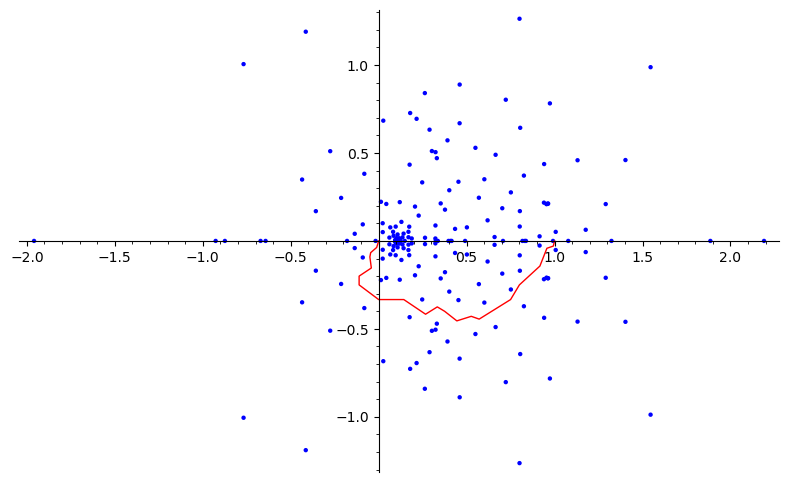

In [19]:
list_plot(per.family.path(only_holomorphic_forms=True), plotjoined=True, color='red', aspect_ratio=1, figsize=8) + list_plot([p for p in per.family._singularities(only_holomorphic_forms=True) if p.abs() < 3])

### Computation of the Picard group

In [48]:
%time pic = per.picard()

CPU times: user 164 ms, sys: 4.72 ms, total: 169 ms
Wall time: 166 ms


With the usual caveat concerning numerical computations, this is the basis of the Picard group in $H_2(X, \mathbb{Z})$...

In [49]:
pic.basis

[ 1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
[ 1  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
[ 0  0  0  1  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  0 -1  0 -1  0  1  0  0  1  0  0  0  0  0  0  0  0]
[ 0  0  1  0  0  0  0  0 -1  0  1  0  0  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  1  0 -1  0  0  0  0  0  0  1  0  0  0  0]
[ 0  0  0  0  0  0  0  0  1  0  0  0  0 -1  0 -1  0  1  0  0  0  0]
[ 1  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0]

...and this is the intersection matrix of this basis:

In [50]:
pic.intersection_matrix

[-4 -2  0  0  2 -1  2  0  0  0  2  1  0 -1]
[-2 -4  0  0  1 -1  1  0  0  0  1  2  0 -1]
[ 0  0 -4  0 -1 -2 -1  0  0  0  1  1  0 -2]
[ 0  0  0 -4 -1  2  1  0  2  0 -1 -1  0 -2]
[ 2  1 -1 -1 -4  0  0  0  2 -3 -3  0  1  0]
[-1 -1 -2  2  0 -4  0  0 -1 -2  0  2  1  0]
[ 2  1 -1  1  0  0 -4 -2 -1  3  1 -2 -1  0]
[ 0  0  0  0  0  0 -2 -6  2  2  0 -2 -1  0]
[ 0  0  0  2  2 -1 -1  2 -4  1  2  0  1  1]
[ 0  0  0  0 -3 -2  3  2  1 -8 -5  3  4  2]
[ 2  1  1 -1 -3  0  1  0  2 -5 -6  1  3  2]
[ 1  2  1 -1  0  2 -2 -2  0  3  1 -4 -2  0]
[ 0  0  0  0  1  1 -1 -1  1  4  3 -2 -6 -1]
[-1 -1 -2 -2  0  0  0  0  1  2  2  0 -1 -4]

...and finally the coefficient of the hyperplane section in the basis above:

In [24]:
pic.polarization

(3, -3, -3, 3, 4, 0, 2, 2, 4, -1, 0, -6, 2, 0)

Numerical computation is not perfect, if we missed a generator of the Picard group, then its Euclidean norm is at least $10^{143}$. This can to the degree of the generators as algebraic curves. A missing generator is an algebraic curve of degree at least $10^{70}$.

In [26]:
pic.half_certificate

{'N': 9, 'logB': 142, 'logE': -590, 'rarity': 145}

In [32]:
pic.smooth_rational_curves(1)

[(1, -1, -1, 1, 1, 0, 1, 1, 1, 0, 0, -2, 1, 0),
 (1, 0, 0, 0, 1, 0, 0, 0, 1, -1, 1, 0, 0, 0),
 (1, -1, -1, 1, 1, 0, 1, 0, 1, 0, 0, -2, 1, 0),
 (0, -1, -1, 1, 1, 0, 0, 1, 1, 0, -1, -2, 0, 0)]

In [53]:
pic._divisors(1,3)

[(2, -2, -2, 2, 3, 0, 1, 1, 3, -1, 0, -4, 1, 0),
 (2, -3, -3, 3, 3, 0, 2, 2, 3, 0, -1, -6, 2, 0),
 (2, -2, -2, 2, 3, 0, 1, 2, 3, -1, 0, -4, 1, 0),
 (3, -2, -2, 2, 3, 0, 2, 1, 3, -1, 1, -4, 2, 0)]

In [55]:
matrix(pic._divisors(1,3)) * pic.intersection_matrix * matrix(pic.smooth_rational_curves(1)).transpose()

[3 0 0 0]
[0 3 0 0]
[0 0 3 0]
[0 0 0 3]

In [56]:
pic.half_certificate

{'N': 9, 'logB': 142, 'logE': -590, 'rarity': 145}